<a href="https://colab.research.google.com/github/OnkarSwaroop07/Bank_Cust_Segmentation/blob/main/Bank_Cust_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_cust_segment.csv to bank_cust_segment (1).csv
Saving bank_transactions.csv to bank_transactions.csv
Saving ind_city_data.csv to ind_city_data (1).csv


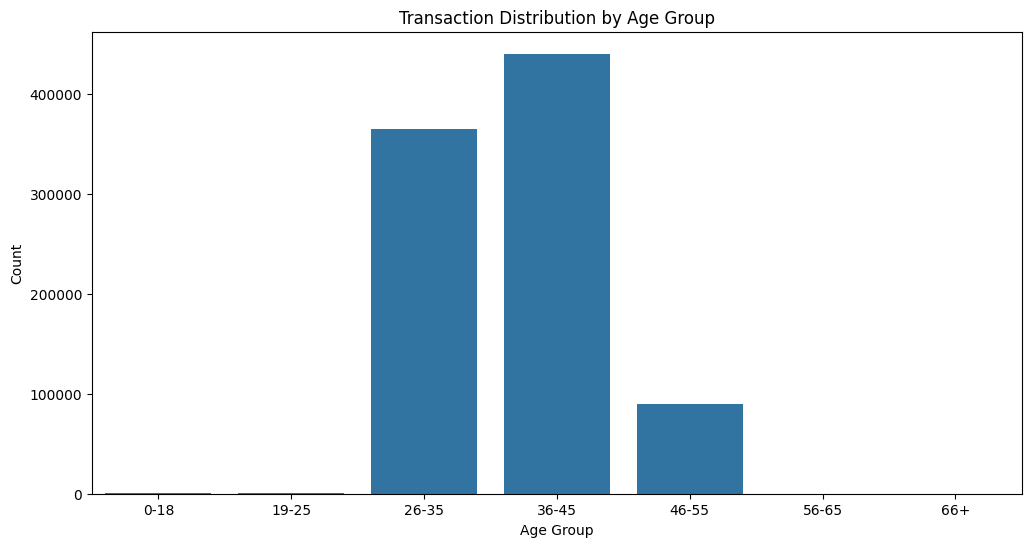

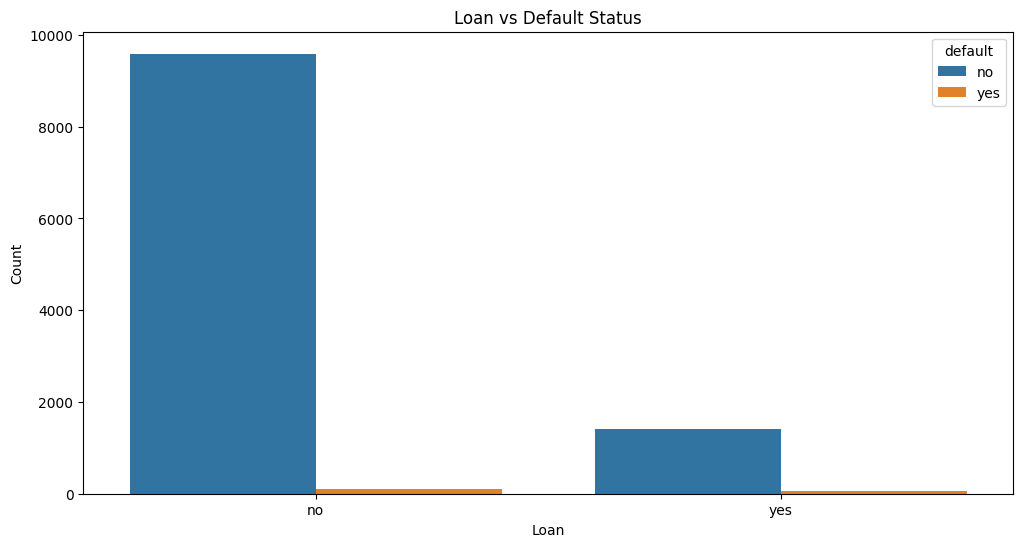

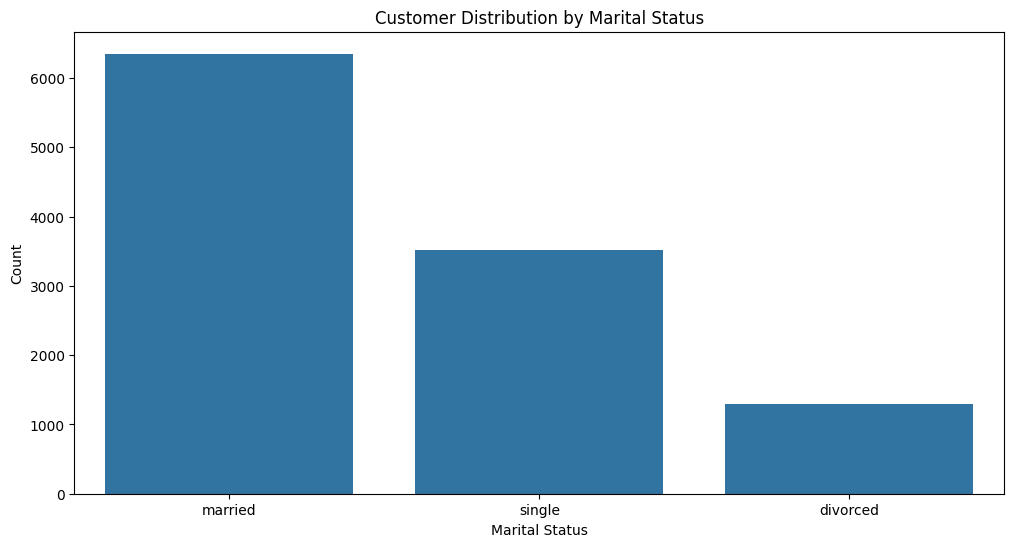

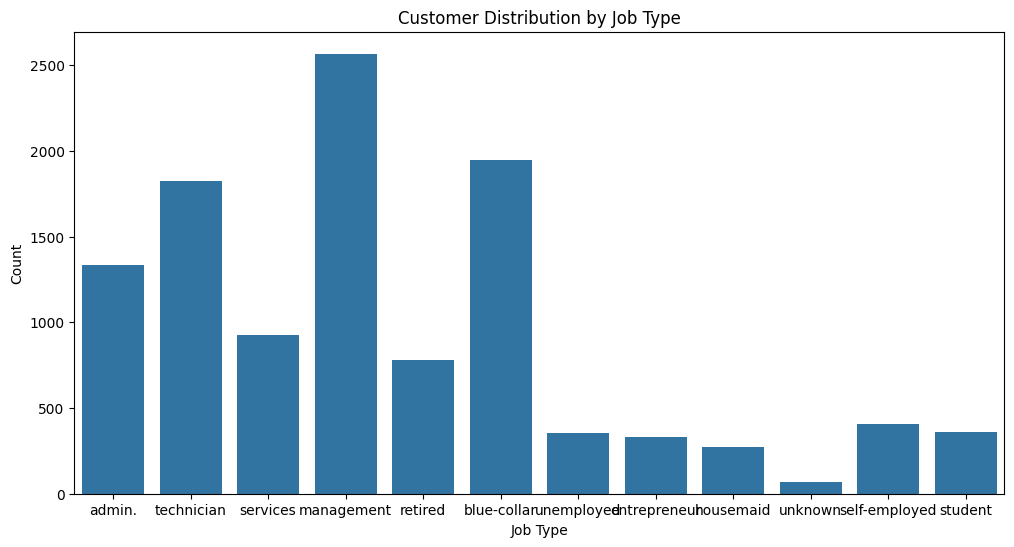

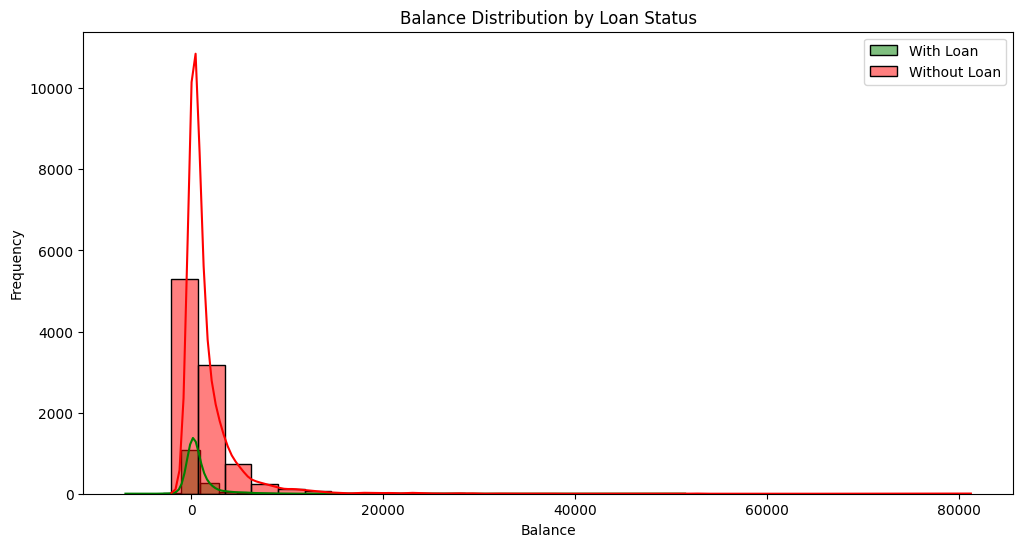

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Load the datasets (assuming you have uploaded them)
df_transactions = pd.read_csv('bank_transactions.csv')
df_segments = pd.read_csv('bank_cust_segment.csv')
df_ind_city_data = pd.read_csv('ind_city_data.csv')

# Data Cleaning for Transactions
# Interpolate missing values for CustAccountBalance
df_transactions['CustAccountBalance'] = df_transactions['CustAccountBalance'].interpolate(method='linear')

# Function to parse dates in various formats
def parse_dates(date_str):
    for fmt in ('%d-%m-%Y', '%m/%d/%Y', '%Y-%m-%d'):
        try:
            return pd.to_datetime(date_str, format=fmt)
        except ValueError:
            continue
    return pd.to_datetime(date_str, errors='coerce')

# Apply date parsing function and fill missing values with median date
df_transactions['CustomerDOB'] = df_transactions['CustomerDOB'].apply(parse_dates)
median_dob = df_transactions['CustomerDOB'].median()
df_transactions['CustomerDOB'] = df_transactions['CustomerDOB'].fillna(median_dob)

# Calculate age and categorize into age groups
df_transactions['CustomerAge'] = (pd.to_datetime('today') - df_transactions['CustomerDOB']).dt.days // 365
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '56-65', '66+']
df_transactions['AgeGroup'] = pd.cut(df_transactions['CustomerAge'], bins=bins, labels=labels, right=False)

# Save cleaned transactions dataset
df_transactions.to_csv('cleaned_transactions.csv', index=False)

# Visualization for Transactions
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', data=df_transactions)
plt.title('Transaction Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.savefig('transaction_distribution_by_age_group.png')
plt.show()

# Data Cleaning for Segments
df_segments = df_segments.drop(columns=['contact', 'duration', 'previous', 'poutcome'])
df_segments['Date'] = df_segments['day'].astype(str).str.zfill(2) + '-' + df_segments['month']
df_segments = df_segments.drop(columns=['day', 'month'])

# Save cleaned segments dataset
df_segments.to_csv('cleaned_segments.csv', index=False)

# Visualization for Segments

# Loan vs Default Status
plt.figure(figsize=(12, 6))
sns.countplot(x='loan', hue='default', data=df_segments)
plt.title('Loan vs Default Status')
plt.xlabel('Loan')
plt.ylabel('Count')
plt.savefig('loan_vs_default_status.png')
plt.show()

# Customer Distribution by Marital Status
plt.figure(figsize=(12, 6))
sns.countplot(x='marital', data=df_segments)
plt.title('Customer Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.savefig('customer_distribution_by_marital_status.png')
plt.show()

# Customer Distribution by Job Type
plt.figure(figsize=(12, 6))
sns.countplot(x='job', data=df_segments)
plt.title('Customer Distribution by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.savefig('customer_distribution_by_job_type.png')
plt.show()

# Balance Distribution by Loan Status
plt.figure(figsize=(12, 6))
sns.histplot(df_segments[df_segments['loan'] == 'yes']['balance'], bins=30, kde=True, color='green', label='With Loan')
sns.histplot(df_segments[df_segments['loan'] == 'no']['balance'], bins=30, kde=True, color='red', label='Without Loan')
plt.title('Balance Distribution by Loan Status')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('balance_distribution_by_loan_status.png')
plt.show()

# Download the cleaned datasets
files.download('cleaned_transactions.csv')
files.download('cleaned_segments.csv')

# Download the visualization images
files.download('transaction_distribution_by_age_group.png')
files.download('loan_vs_default_status.png')
files.download('customer_distribution_by_marital_status.png')
files.download('customer_distribution_by_job_type.png')
files.download('balance_distribution_by_loan_status.png')


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank_cust_segment.csv to bank_cust_segment (2).csv
Saving bank_transactions.csv to bank_transactions (1).csv
Saving ind_city_data.csv to ind_city_data (2).csv
